In [9]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Import Dataframe

The first two dataframes were scraped from basket-ballreference.com from the 2018-2019 season

In [10]:
poss = pd.read_csv('season1819.csv')
ad_1819 = pd.read_csv('ad_1819.csv')

In [11]:
#dropping the duplicates of each dataframe
poss = poss.drop_duplicates(subset = 'Player', keep = 'first')
ad_1819 = ad_1819.drop_duplicates(subset = 'Player', keep = 'first')

In [12]:
poss = poss.drop(['Unnamed: 0', 'Unnamed: 29', 'url_list', 'GS'], axis = 1)
ad_1819 = ad_1819.drop(['Unnamed: 0', 'Pos', 'Age', 'Tm', 'G',
                       'MP'], axis = 1)

In [13]:
season = pd.merge(poss, ad_1819, on = 'Player')
season = season.fillna(0)
season = season[season['G'] > 30]

In [14]:
season.shape

(384, 51)

In [15]:
season.columns

Index(['Player', 'Pos', 'Age', 'Tm', 'G', 'MP', 'FG', 'FGA', 'FG%', '3P',
       '3PA', '3P%', '2P', '2PA', '2P%', 'FT', 'FTA', 'FT%', 'ORB', 'DRB',
       'TRB', 'AST', 'STL', 'BLK', 'TOV', 'PF', 'PTS', 'ORtg', 'DRtg', 'PER',
       'TS%', '3PAr', 'FTr', 'ORB%', 'DRB%', 'TRB%', 'AST%', 'STL%', 'BLK%',
       'TOV%', 'USG%', ' ', 'OWS', 'DWS', 'WS', 'WS/48', ' .1', 'OBPM', 'DBPM',
       'BPM', 'VORP'],
      dtype='object')

Text(0.5, 1, 'Wins Sared + VORP score from sports-reference')

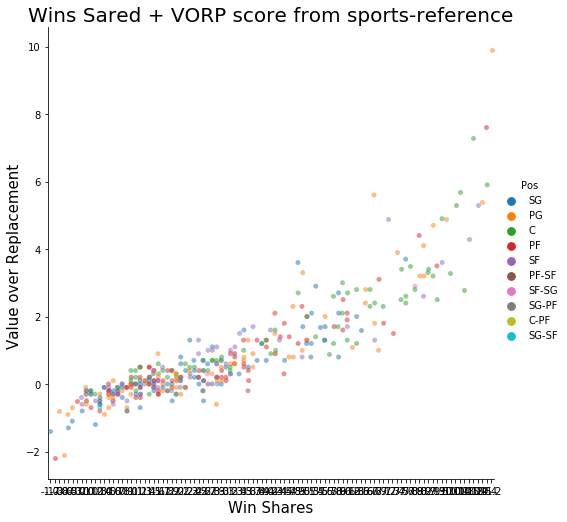

In [16]:
sns.catplot(x = 'WS', y ='VORP', hue = 'Pos', data=season, alpha = 0.5,
           height = 7)

plt.xlabel("Win Shares", fontsize = 15)
plt.ylabel("Value over Replacement ", fontsize = 15)
plt.title('Wins Sared + VORP score from sports-reference', fontsize = 20)

Text(0.5, 1, 'ORtg + DRtg score from sports-reference')

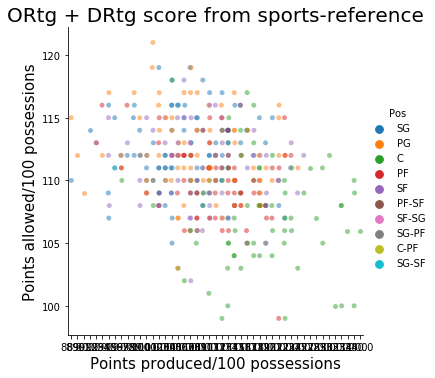

In [17]:
sns.catplot(x = 'ORtg', y ='DRtg', hue = 'Pos', data=season, alpha = 0.5)

plt.xlabel("Points produced/100 possessions", fontsize = 15)
plt.ylabel("Points allowed/100 possessions", fontsize = 15)
plt.title('ORtg + DRtg score from sports-reference', fontsize = 20)

In [18]:
pct_stats = ['FG%', '3P%', '2P%', 'FT%', 'TS%', 'ORB%',
            'DRB%', 'TRB%', 'AST%', 'STL%', 'BLK%',
            'TOV%', 'USG%']

In [19]:
season[pct_stats]

,FG%,3P%,2P%,FT%,TS%,ORB%,DRB%,TRB%,AST%,STL%,BLK%,TOV%,USG%
0,0.357,0.323,0.500,0.923,0.507,0.9,7.8,4.2,4.3,1.3,0.9,7.9,12.2
2,0.345,0.338,0.361,0.778,0.474,2.6,12.3,7.4,19.8,1.5,1.0,19.7,13.5
3,0.595,0.000,0.596,0.500,0.591,14.7,14.8,14.7,6.6,2.0,2.4,12.6,16.4
4,0.576,0.200,0.588,0.735,0.623,9.2,24.0,16.6,14.2,1.8,3.0,17.1,15.8
7,0.519,0.238,0.528,0.847,0.576,10.3,19.8,15.1,11.6,0.8,3.4,8.8,26.9
...,...,...,...,...,...,...,...,...,...,...,...,...,...
525,0.527,0.349,0.564,0.644,0.569,8.7,14.4,11.7,12.0,2.4,1.3,12.0,18.0
526,0.418,0.324,0.477,0.829,0.539,2.6,10.2,6.3,40.5,1.3,0.5,17.6,28.4
527,0.551,0.273,0.570,0.787,0.611,9.4,19.7,14.5,12.1,1.5,2.9,13.2,16.3
529,0.553,0.000,0.553,0.705,0.590,10.6,22.8,16.4,7.7,0.6,1.8,13.6,18.2


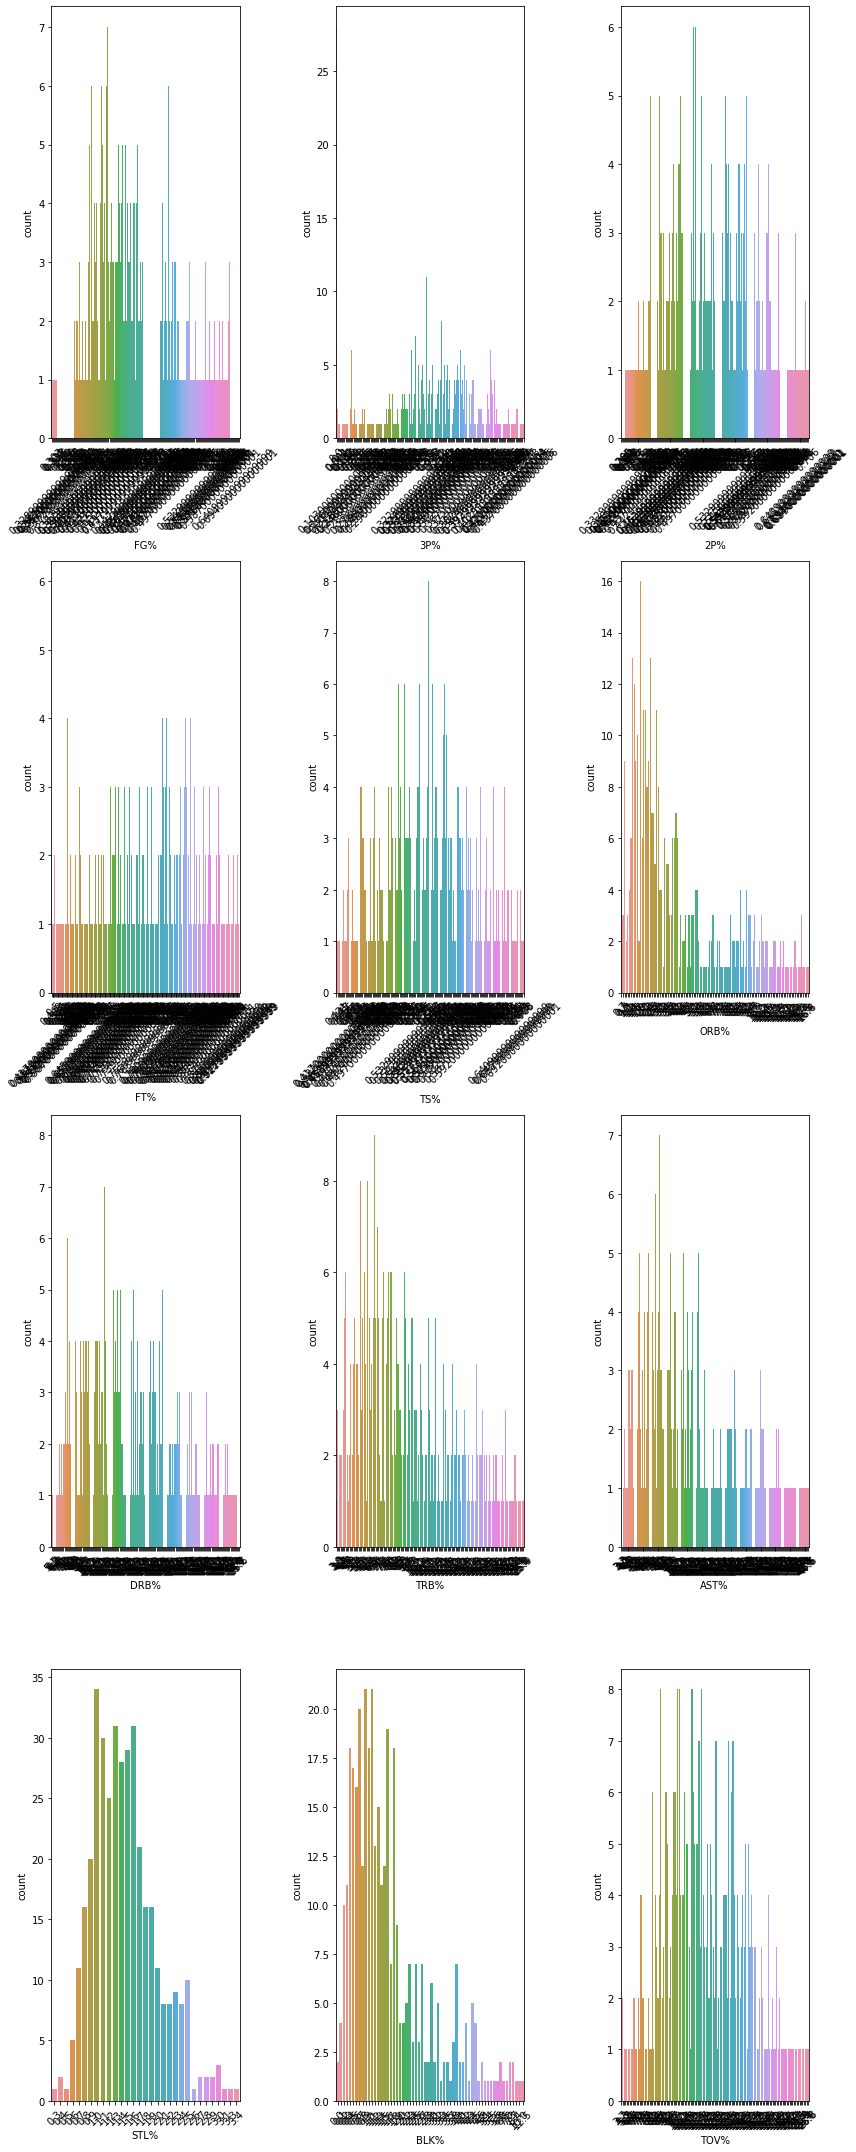

In [20]:
fig, axes = plt.subplots(round(len(season[pct_stats].columns) / 3), 3, figsize=(12, 30))

for i, ax  in enumerate(fig.axes):
    if i < len(season[pct_stats].columns):
        #x axis label rotation code from Stack overflow
        ax.set_xticklabels(ax.xaxis.get_majorticklabels(), rotation=45)
        sns.countplot(x=season[pct_stats].columns[i], data=season[pct_stats], ax=ax)
fig.tight_layout()

# 538 Dataframe

Last scraped 11/21 - 538 automatically defaults these ratings based on minutes played - As of todya it defaults at 199 

In [56]:
#this is 2019-2020 season rankings form 538
scrape538 = pd.read_csv('data/scrape538.csv') 
scrape538 = scrape538.drop(['Unnamed: 0'], axis = 1)

In [57]:
scrape538.shape

(447, 14)

In [58]:
scrape538.head()

,Player,Team,Position(s),Minutes,BSR Off.,BSR Def.,BSR Total,OOR Off.,OOR Def.,OOR Total,OVR Off.,OVR Def.,OVR total,WAR
0,James Harden,Rockets,"PG, SG",550,11.1,-0.1,11.0,1.5,9.4,10.9,10.2,1.3,11.5,4.0
1,Luka Doncic,Mavericks,"PG, SG, SF",480,10.8,1.6,12.3,4.9,-5.0,-0.1,10.2,0.7,10.9,3.4
2,LeBron James,Lakers,"PG, SF, PF",489,8.0,0.6,8.6,14.4,1.9,16.3,9.3,0.8,10.1,3.2
3,Damian Lillard,Trail Blazers,PG,536,8.6,-2.0,6.6,6.3,-0.3,6.0,8.6,-1.8,6.8,2.6
4,Giannis Antetokounmpo,Bucks,"SF, PF",459,4.4,3.3,7.7,3.9,4.7,8.7,4.5,3.6,8.1,2.6


In [ ]:
sns.catplot(x = '')

Text(0.5, 1, 'WAR + OVR total per team')

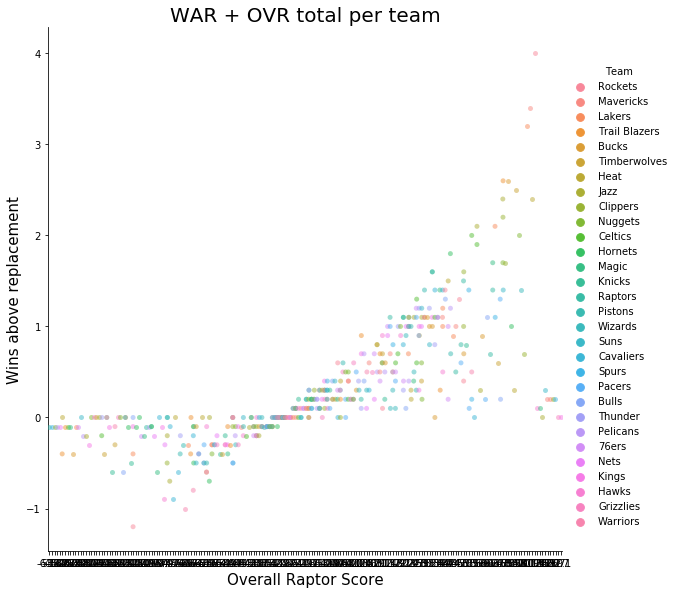

In [64]:
sns.catplot(x = 'OVR total', y ='WAR', hue = 'Team', data=scrape538, alpha = 0.5,
           height= 8)
plt.xlabel("Overall Raptor Score", fontsize = 15)
plt.ylabel("Wins above replacement", fontsize = 15)
plt.title('WAR + OVR total per team', fontsize = 20)